### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

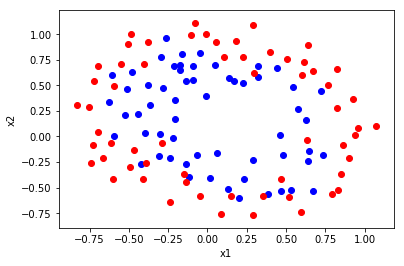

In [2]:
# Load dataset
data = np.genfromtxt('/Users/fernandamurillo/Documents/Fall 2019/ML_AI/HW/24787-hw3-handout/q3_data.csv', delimiter=',')
X = data[:,0:2]
y = data[:,2]

# Plot points
for i in range(len(data)):
    if data[:,2][i] == 0:
        plt.scatter(X[:,0][i],X[:,1][i],color='red')
    else:
        plt.scatter(X[:,0][i],X[:,1][i],color='blue')
        
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [3]:
# Transform points to 28D space
def map_feature(X,degree):
    
    #two dimensional features
    x1 = X[:,0].reshape(-1,1)
    x2 = X[:,1].reshape(-1,1)
    
    #initialize
    m_features = np.ones(x1.shape)
    
    for i in range(1, degree+1):
        for j in range(i+1):
            result = (x1**(i-j))*(x2**j)
            m_features = np.append(m_features, result, axis=1)

    return m_features

mapped_features = map_feature(X,6)

# P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- the hyper-parameter $\lambda$ is set to 1
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

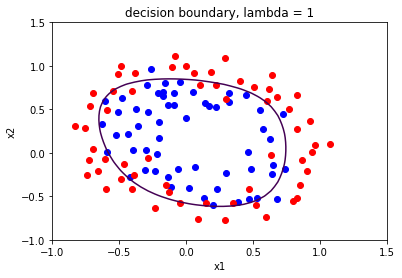

In [4]:
# Define your functions here

def sigmoid(inputs,weights):
    z = inputs@weights
    h = 1/(1+np.exp(-z))
    return(h)

def log_likelihood(inputs, labels, weights, lam): 
    h = sigmoid(inputs, weights)
    log_like = (-1/(len(inputs))) * np.sum(labels * np.log(h) + (1-labels) * np.log(1 - h))
    reg_loglike = log_like + lam/(2*len(labels))*np.sum(weights**2)
    return(reg_loglike)

def logistic_regression(inputs, labels, weights,lam):
    
    labels = labels[:,np.newaxis]
    h = sigmoid(inputs,weights)
    J = log_likelihood(inputs,labels,weights,lam)
    
    grad_array = (1/len(labels))*(inputs.T@(h-labels))
    grad0 = grad_array[0]
    grad1 = grad_array[1:]+(lam/len(labels))*weights[1:]
    
    gradient = np.vstack((grad0[:,np.newaxis],grad1))
  
    return(J,gradient)

def grad_descent(inputs, labels, weights,learning_rate, iterations,lam):
    for i in range(iterations):
        J, gradient = logistic_regression(inputs, labels, weights,lam)
        weights = weights-(learning_rate*gradient)
    return(weights)

# parameters
w_0 = np.zeros((mapped_features.shape[1],1))
lam_da = 1
itera = 1000
lr = 1

weights = grad_descent(mapped_features,y,w_0,lr,itera,lam_da)


# Plot decision boundary
# Plot scatter data
for i in range(len(data)):
    if data[:,2][i] == 0:
        plt.scatter(X[:,0][i],X[:,1][i],color='red')
    else:
        plt.scatter(X[:,0][i],X[:,1][i],color='blue')

# plot boundary
def feature_plot(x1,x2,degree):
    m_feature = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            result = (x1**(i-j))*(x2**j)
            m_feature = np.append(m_feature, result)
            
    return m_feature

x1_range = np.linspace(-1,1.5,50)
x2_range = np.linspace(-1,1.5,50)
decision_bound = np.zeros((len(x1_range),len(x2_range)))
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        decision_bound[i,j] = feature_plot(x1_range[i],x2_range[j],6) @ weights
plt.contour(x1_range,x2_range,decision_bound.T,0)
plt.title('decision boundary, lambda = 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
        

    

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 100]$
- draw the decision boundaries


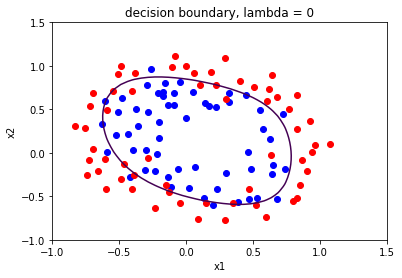

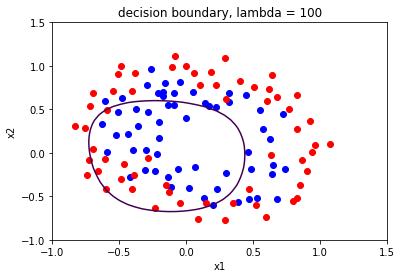

In [5]:
# lambda = 0
lam_da = 0
w_0 = np.zeros((mapped_features.shape[1],1))
itera = 1000
lr = 1

weights = grad_descent(mapped_features,y,w_0,lr,itera,lam_da)

# Plot scatter data
for i in range(len(data)):
    if data[:,2][i] == 0:
        plt.scatter(X[:,0][i],X[:,1][i],color='red')
    else:
        plt.scatter(X[:,0][i],X[:,1][i],color='blue')
        
decision_bound = np.zeros((len(x1_range),len(x2_range)))
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        decision_bound[i,j] = feature_plot(x1_range[i],x2_range[j],6) @ weights
plt.contour(x1_range,x2_range,decision_bound.T,0)
plt.title('decision boundary, lambda = 0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
        
# lambda = 100
lam_da = 100
w_0 = np.zeros((mapped_features.shape[1],1))

weights = grad_descent(mapped_features,y,w_0,lr,itera,lam_da)

# Plot scatter data
for i in range(len(data)):
    if data[:,2][i] == 0:
        plt.scatter(X[:,0][i],X[:,1][i],color='red')
    else:
        plt.scatter(X[:,0][i],X[:,1][i],color='blue')
        
decision_bound = np.zeros((len(x1_range),len(x2_range)))
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        decision_bound[i,j] = feature_plot(x1_range[i],x2_range[j],6) @ weights
plt.contour(x1_range,x2_range,decision_bound.T,0)
plt.title('decision boundary, lambda = 100')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
# lamda 0 seems to be the best decision boundary, it is more elliptical than lambda 1, and lambda 100 
# seems to be very offset and too small. Since the hyper parameter lambda influences the gradient directly,and the 
# gradient influences the weights, then changing lambda affects the decision boundary, as we can see above.